## Imports

In [3]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict
from operator import itemgetter

## Data Preparation

In [5]:
everything = defaultdict(list)
all_keys = []

G = nx.Graph()
file = "datasets/gene_expression_dataset.txt"

with open(file) as f:
    first_line = f.readline()
    for line in f:
        m = line.strip("\n").split("\t")
        everything[m[0]] = m[1:]
        all_keys.append(m[0])

threshold = 0.9

for key, value in everything.items():
    for key1, value1 in everything.items():
        if key != key1:
            first_value = [float(v) for v in value]
            second_value = [float(v) for v in value1]

            values = round(np.corrcoef(first_value, second_value)[1, 0], 4)

            # If pcc is greater than some threshold, draw an edge
            if values > threshold:
                G.add_edge(key, key1)

nx.write_edgelist(G, "datasets/edge_list_90.txt", data=False)

In [29]:
edge_list_path = 'datasets/edge_list_75.txt'
G = nx.Graph()

with open(edge_list_path, 'r') as file:
    for line in file:
        node1, node2 = line.strip().split()
        G.add_edge(node1, node2)

## Visualization

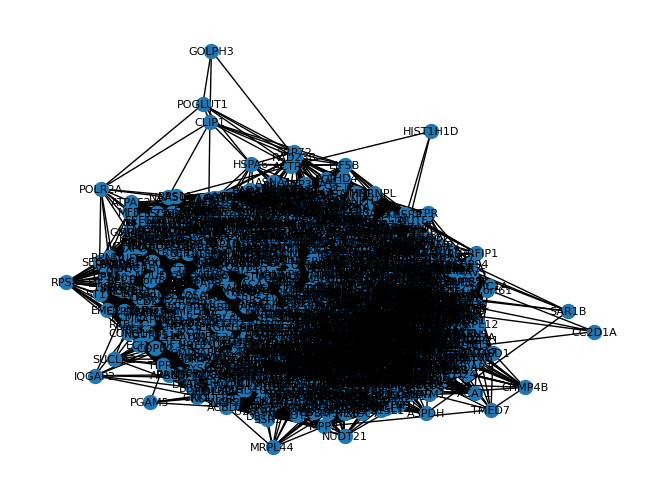

In [30]:
pos = nx.spring_layout(G)  
nx.draw(G, pos, with_labels=True, font_size=8, node_size=100, font_color='black', alpha=1.0)
plt.show()

## Degree Centrality Distribution

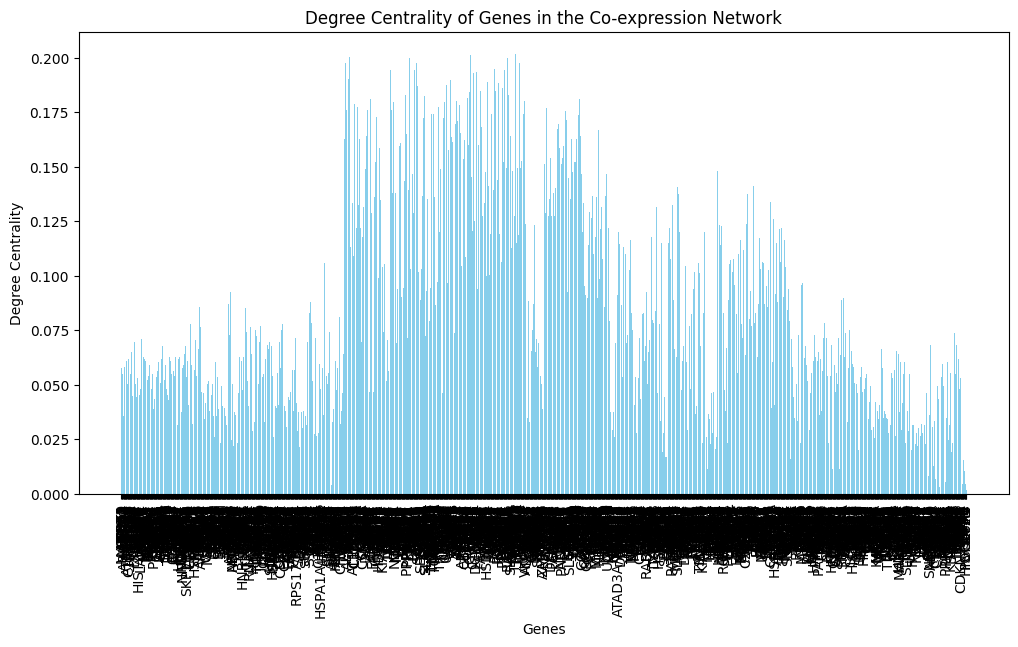

In [31]:
degree_centrality = nx.degree_centrality(G)

plt.figure(figsize=(12, 6))
plt.bar(degree_centrality.keys(), degree_centrality.values(), color='skyblue')
plt.title('Degree Centrality of Genes in the Co-expression Network')
plt.xlabel('Genes')
plt.ylabel('Degree Centrality')
plt.xticks(rotation = 90)
plt.show()

## Degree Distribution

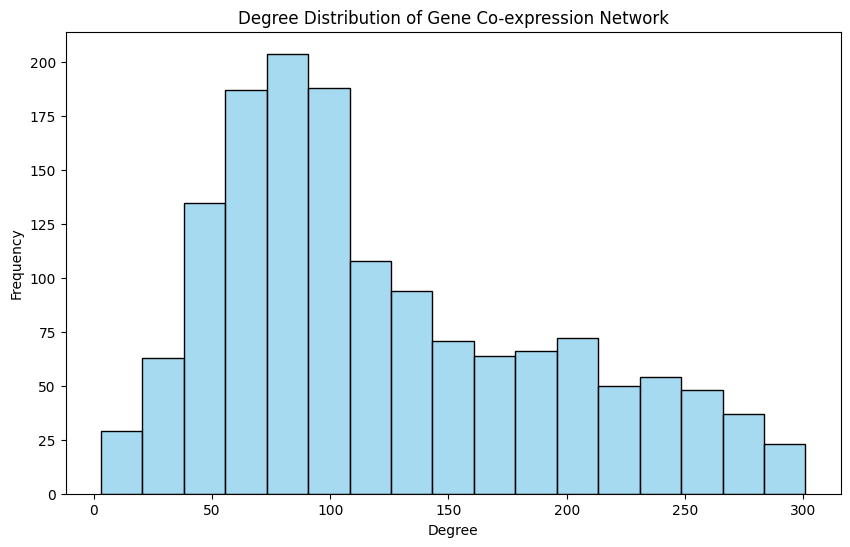

In [32]:
# Calculate degree for each node
degrees = dict(G.degree())

# Plot degree distribution
plt.figure(figsize=(10, 6))
sns.histplot(list(degrees.values()), kde=False, color='skyblue')
plt.title('Degree Distribution of Gene Co-expression Network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

## Number of Nodes in the network

In [33]:
nx.number_of_nodes(G)

1493

## Number of Edges in the network

In [34]:
nx.number_of_edges(G)

91622

## Betweenness Centrality

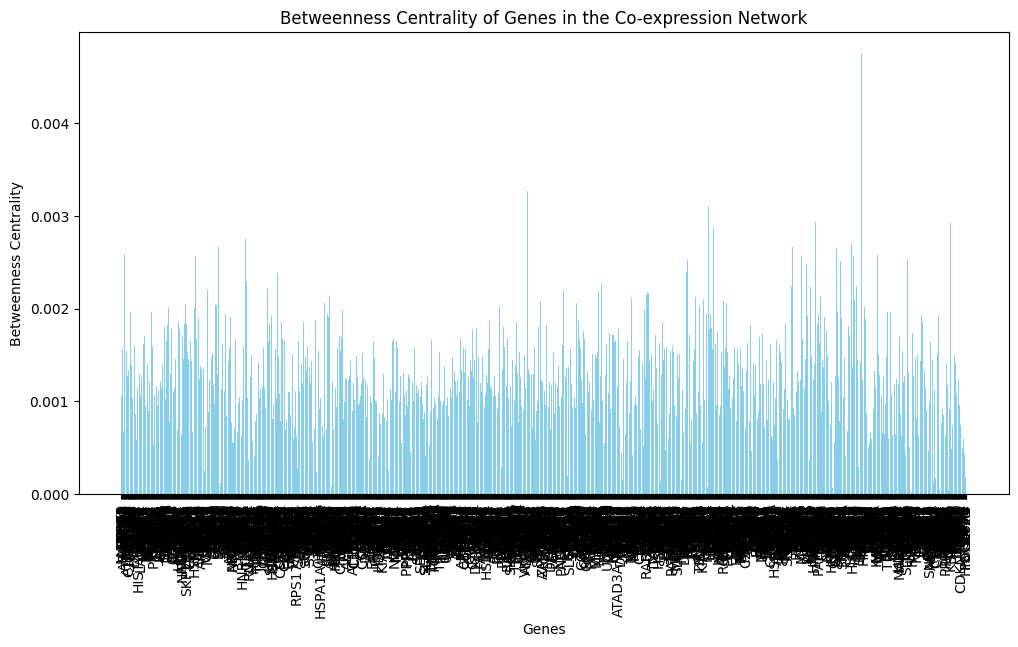

In [35]:
betweenness_centrality = nx.betweenness_centrality(G)

plt.figure(figsize=(12, 6))
plt.bar(betweenness_centrality.keys(), betweenness_centrality.values(), color='skyblue')
plt.title('Betweenness Centrality of Genes in the Co-expression Network')
plt.xlabel('Genes')
plt.ylabel('Betweenness Centrality')
plt.xticks(rotation=90)
plt.show()

## Shortest Path Length
Taking very long time

In [36]:
# shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

# shortest_path_df = pd.DataFrame(shortest_path_lengths)

# plt.figure(figsize=(12, 10))
# sns.heatmap(shortest_path_df, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'Shortest Path Length'})
# plt.title('Shortest Path Lengths between Genes in the Co-expression Network ')
# plt.show()

## Clustering Coefficient of each node

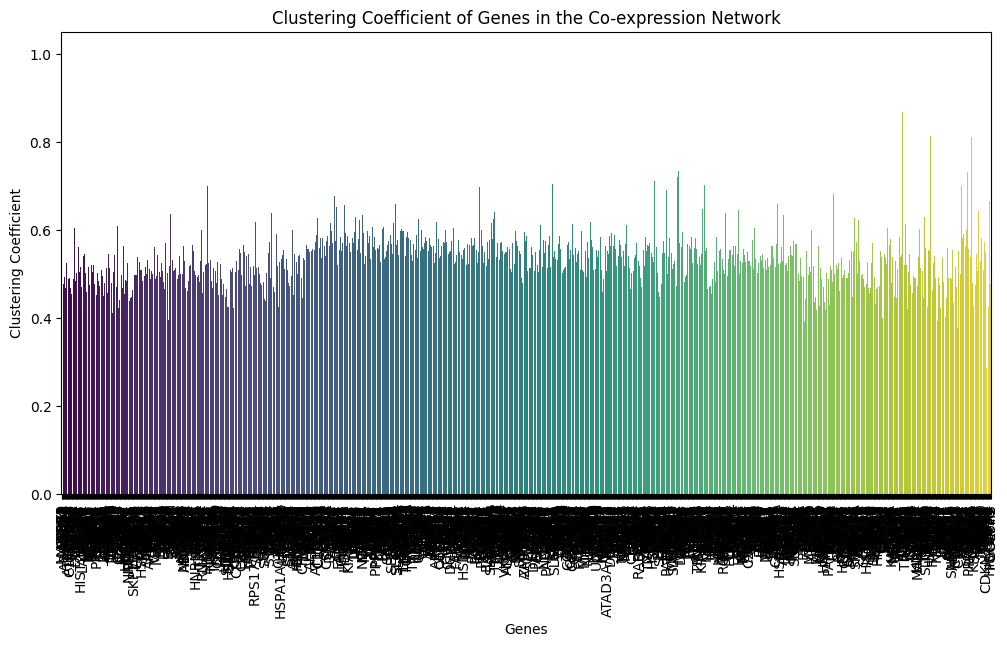

In [37]:
clustering_coefficients = nx.clustering(G)

clustering_coefficients_df = pd.DataFrame(list(clustering_coefficients.items()), columns=['Gene', 'Clustering Coefficient'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Gene', y='Clustering Coefficient', hue='Gene', data=clustering_coefficients_df, palette='viridis', legend=False)
plt.title('Clustering Coefficient of Genes in the Co-expression Network')
plt.xlabel('Genes')
plt.ylabel('Clustering Coefficient')
plt.xticks(rotation=90)
plt.show()

## Average Clustering Coefficient

In [38]:
average_clustering_coefficient = nx.average_clustering(G)
print(f"Average Clustering Coefficient: {average_clustering_coefficient:.4f}")

Average Clustering Coefficient: 0.5332


## Degree Correlation Coefficient

In [39]:
degree_correlation_coefficient = nx.degree_assortativity_coefficient(G)
print(f"Degree Correlation Coefficient: {degree_correlation_coefficient:.4f}")

Degree Correlation Coefficient: 0.7085


## Closeness Centrality

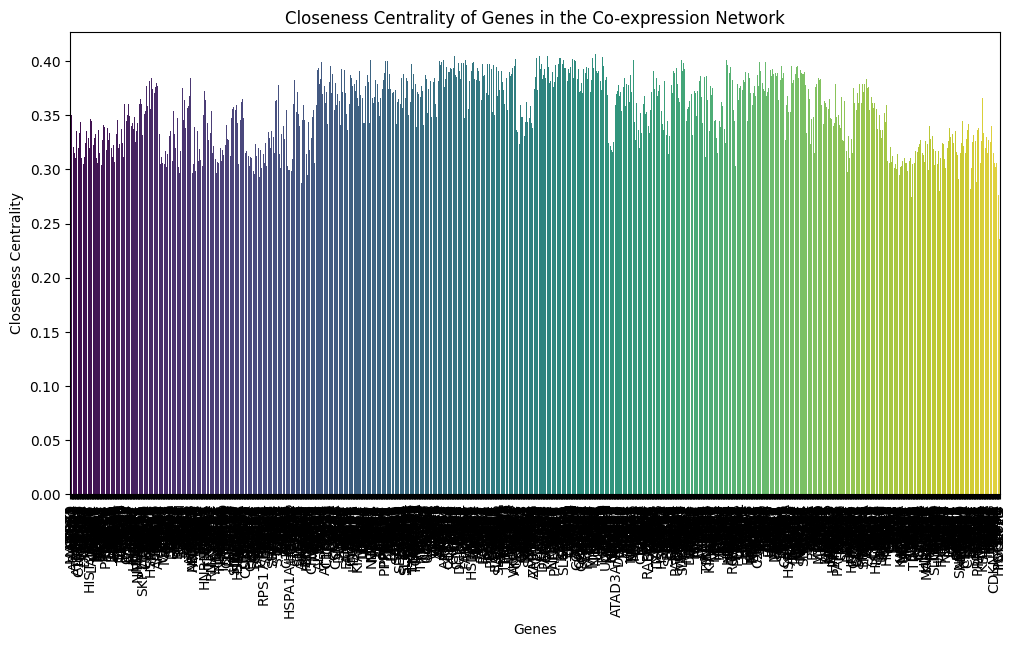

In [40]:
closeness_centrality = nx.closeness_centrality(G)

closeness_centrality_df = pd.DataFrame(list(closeness_centrality.items()), columns=['Gene', 'Closeness Centrality'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Gene', y='Closeness Centrality', data=closeness_centrality_df, hue='Gene', palette='viridis', legend = False)
plt.title('Closeness Centrality of Genes in the Co-expression Network')
plt.xlabel('Genes')
plt.ylabel('Closeness Centrality')
plt.xticks(rotation=90)
plt.show()

## Clustering Modularity 

In [41]:
import community as community_louvain

cm = community_louvain.best_partition(G)
mod = community_louvain.modularity(cm, G)
print("Clustering Modularity: ", mod)

Clustering Modularity:  0.4528375270491622


## Identification of hubs

In [42]:
hubs = sorted(G.degree(), key = itemgetter(1), reverse=True)

print("Top 10 hubs are: ")
for hub in range(10):
    print(hub, ":", hubs[hub][0])

Top 10 hubs are: 
0 : TLN1
1 : NCLN
2 : CORO1C
3 : ANXA5
4 : PSMA7
5 : RANGAP1
6 : PRKACA
7 : ACTG1
8 : RQCD1
9 : TUBB


## Size of biggest cluster

In [43]:
connected_components = list(nx.connected_components(G))
largest_component = max(connected_components, key=len)

print("Size of the largest connected component:", len(largest_component))

Size of the largest connected component: 1493
